<a href="https://colab.research.google.com/github/neklyud/programming_miem/blob/master/nonlinear_equations_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

In [1]:
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
plt.xkcd()

In [0]:
def f(x):
  return np.sqrt(x) - np.cos(x)

def fprime(x):
  return 0.5/np.sqrt(x) + np.sin(x)

def fLeft(x):
  return np.sqrt(x)

def fLeftPrime(x):
  return 0.5/np.sqrt(x)

def fRight(x):
  return np.cos(x)

def fRightPrime(x):
  return -np.sin(x)


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


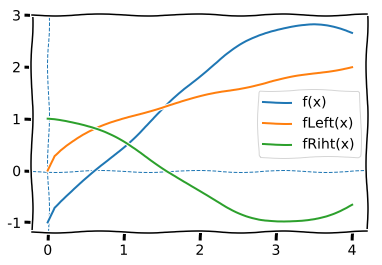

In [3]:
x = np.linspace(0, 4)
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(x, f(x), label='f(x)')
plt.legend()
plt.plot(x, fLeft(x), label='fLeft(x)')
plt.legend()
plt.plot(x, fRight(x), label='fRiht(x)')
plt.legend()
plt.show()

# Требуется монотонный интервал на f(x)

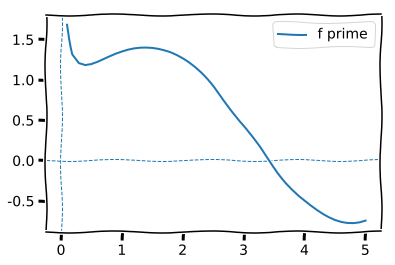

In [4]:
xpr = np.linspace(0.1, 5)
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(xpr, fprime(xpr), label = "f prime")
plt.legend()
plt.show()

# На интервале (0, 3.5) производная больше 0, следовательно константа a должна быть положительна

In [5]:
#Находим локальные минимум и маскимум производных
from scipy.signal import argrelextrema
ext_max = argrelextrema(fprime(xpr), np.greater_equal,order=1)[0]
ext_min = argrelextrema(fprime(xpr), np.less,order=1)[0]
print(ext_max, ext_min)

[ 0 13 49] [ 3 46]


In [6]:
print(xpr[ext_max], xpr[ext_min])

[0.1 1.4 5. ] [0.4 4.7]


# Исключим точки 0.1 и 4.7. m = 0.4 M = 1.4

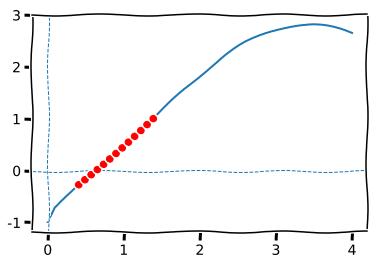

In [7]:
m = 0.4
M = 1.4
x_loc = np.where((x >= m) & (x <= M))[0].tolist()
plt.plot(x, f(x))
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(x[x_loc], f(x[x_loc]), 'ro')

In [0]:
x_loc = x[x_loc]


In [9]:
def fixedPointIteration(m, M, a, eps):
  x0 = m
  xn = M
  it = 0
  a = a/abs(a)*a
  while 1:
    xn = x0 - a*f(x0)
    if abs(xn - x0) < eps:
      return xn, f(xn), it
    x0 = xn
    it += 1
  return xn, f(xn), it
    
print(fixedPointIteration(0.4, 1.4, 0.81, 1e-5))


(0.6417143631324816, -9.464453221141866e-09, 3)


In [0]:
def countIter(eps):
  full = []
  for i in x_loc:
    tup = fixedPointIteration(m, M, i , eps)
    full.append(tup[2])
  return full

In [0]:
full1 = countIter(10e-5)
full2 = countIter(10e-4)
full3 = countIter(10e-3)

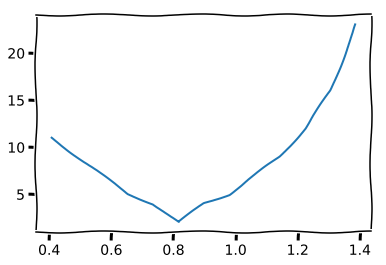

In [15]:
xx = [x_loc[i] for i in range(0, len(full1))]
yy = full1
plt.plot(xx,yy)


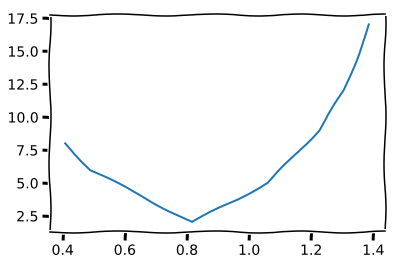

In [16]:
yy = full2
plt.plot(xx,yy)

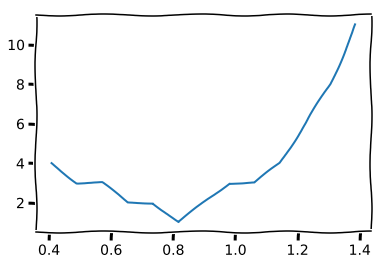

In [17]:
yy = full3
plt.plot(xx,yy)

In [18]:
print(2/(m+M))

1.1111111111111112


# Вывод - минимальное количество итераций не зависит от выбранного a

Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [19]:
print(fixedPointIteration(m, M, 1, 0.001))


(0.6418329448367359, 0.00014498665781992326, 4)


# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.



```
# This is formatted as code
```

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [0]:
def inv_quad_interpolation(func, point_0, point_1, point_2, eps):
  xn3 = 0
  xn2 = point_2
  xn1 = point_1
  xn0 = point_0
  while 1:
    xn3 = func(xn1)*func(xn0)/((func(xn2) - func(xn1))*(func(xn2) - func(xn0)))*xn2 
    xn3 = xn3 + func(xn2)*func(xn0)/((func(xn1) - func(xn2))*(func(xn1) - func(xn0)))*xn1
    xn3 = xn3 +func(xn1)*func(xn2)/((func(xn0) - func(xn1))*(func(xn0) - func(xn2)))*xn0
    temp = xn2
    xn0 = xn1
    xn1 = xn2
    xn2 = xn3
    if abs(xn2 - xn1) < eps:
      break
  return xn0, xn1, xn2

Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

In [0]:
def f(x):
  return 1/np.tan(x)

In [0]:
x = np.linspace(0.5,2, endpoint = False)
#func = dict(zip(x,f))
pnts = inv_quad_interpolation(f, 0.6, 0.8, 0.99, 0.001)

In [23]:
pnts

(1.5729661481390687, 1.5707850316846517, 1.5707963265497369)

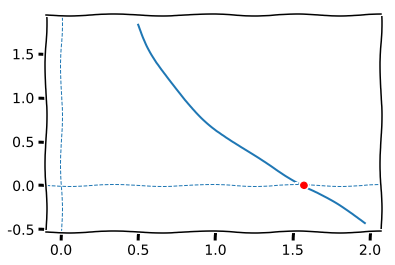

In [25]:
xx = x
yy = f(xx)
plt.plot(xx,yy)
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(pnts[0],f(pnts[0]), "ro")

# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [0]:
# ... ENTER YOUR CODE HERE ...

Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).